# Supervised Classification Capstone - Analyzing Customer Attrition (Churn):

In [2]:
# import preliminary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
data = pd.read_csv("Telco-Customer-Churn.csv")

# copy of data to work with
df = data.copy()

### Data Inspection:

Inspecting the data below:
- There are 7,032 data points of which none are null values (NaN)
- There are 21 columns of which 17 are objects, representing 2 or more categories, 2 are int64, representing the length of time the customer stayed with the company denoted by tenure, and whether the customer was a senior citizen or not (1,0) denoted by SeniorCitizen, and 2 are float64 representing monthly and total charges to customers denoted by MonthlyCharges and TotalCharges
- The customerID column has unique data for each data point, and therefore holds no predictive power nor provides any additional insights about our customers as a whole. For this reason, the column will be removed from the dataset

In [4]:
# preview of the data
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


##### Inspect the unique values and number of unique values in each feature:

The dataframe zipped_df shows the unique values, the number of unique values and the data type of each column. The max column width is expanded to see all the available values inside the dataframe for the object data variables (recall that SeniorCitizen is a binary with 1 classifying the customer as a senior citizen and 0 otherwise), excluding the customerID, TotalCharges, MonthlyCharges, and tenure column, as their values are all very unique (recall that the Tenure column is simply the number of months that the customer stayed with the company)

We also don't have any strange categories in the object data columns that would require feature engineering

In [6]:
# create separate cols
cols = [i for i in df.columns]
unique_vals = [df[i].unique() for i in df.columns]
n_unique = [df[i].nunique() for i in df.columns]
dtype = [df[i].dtype for i in df.columns]


# zip data together
zipped_data = {i:[j,k,l] for i,j,k,l in zip(cols,unique_vals,n_unique,dtype)}


# format zipped data
zipped_df = pd.DataFrame(zipped_data).T
df_col = {0:"unique_vals",1:"n_unique",2:"dtype"}
zipped_df = zipped_df.rename(index=str,columns=df_col)

In [7]:
zipped_df.sort_values(by="n_unique",ascending=False).iloc[:4,:]

,unique_vals,n_unique,dtype
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7032,object
TotalCharges,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...",6530,float64
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",1584,float64
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",72,int64


In [8]:
# adjust column width to see all unique_vals
pd.set_option("max_colwidth", None)

zipped_df.sort_values(by="n_unique",ascending=False).iloc[4:,:]

,unique_vals,n_unique,dtype
PaymentMethod,"[Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]",4,object
DeviceProtection,"[No, Yes, No internet service]",3,object
Contract,"[Month-to-month, One year, Two year]",3,object
StreamingMovies,"[No, Yes, No internet service]",3,object
StreamingTV,"[No, Yes, No internet service]",3,object
TechSupport,"[No, Yes, No internet service]",3,object
OnlineBackup,"[Yes, No, No internet service]",3,object
OnlineSecurity,"[No, Yes, No internet service]",3,object
InternetService,"[DSL, Fiber optic, No]",3,object
MultipleLines,"[No phone service, No, Yes]",3,object


In [9]:
# reset max_colwidth to original size 
pd.reset_option("max_colwidth")

In [10]:
# removing the customerID column, as it yields no predictive power
df = df.drop("customerID",axis=1)

### Exploratory Data Analysis:

In [11]:
# statisical summary of continuous data
df.describe().iloc[1:,1:]

,tenure,MonthlyCharges,TotalCharges
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


A few things we can note from the statistical summary of the data shown above:
- Customers on average stay with the company for 33 months and incur an average monthly and total charge of \\$64.80, $2,283.30 respectively
- There are customers who leave after the 1st month and those who have been customers for 72 months highlighted by the min and max vals. The 1st, 2nd and 3rd quartile data tell us that 25%, 50% and 75% of these customers stay for periods between 1 and 9 months, 1 and 29 months and 1 and 55 months respectively
- The monthly charges for customers are between \\$18.25 and \\$118.75 with 25%, 50% and 75% of these customers having monthly charges of less than or equal to \\$35.59, \\$70.35, and \\$89.86 respectively
- Throughout the entire duration of their stay, 25%, 50% and 75% of customers will end up paying the company a total of less than or equal to \\$401.45, \\$1,397.48 and \\$3,794.74, with total charges being a function of their monthly charges and how long the customer stays with the company: MonthlyCharges * tenure

Churn Stats:
------------------------------------------------------------
Churn yes count: 1869
Churn no count: 5163
Percentage of churn = Yes: 26.58%
Percentange of churn = No: 73.42%


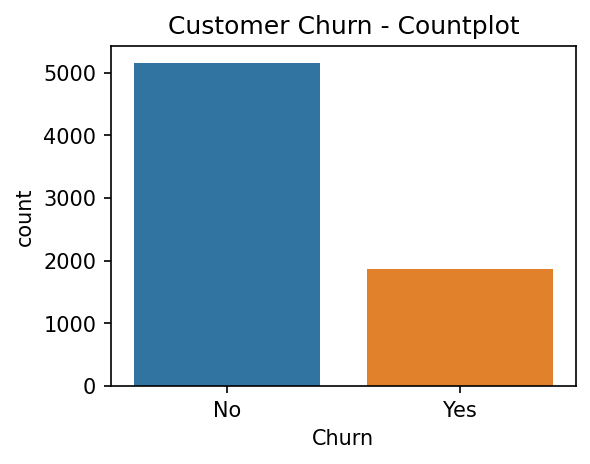

In [12]:
# Computing x displaying churn stats
churn_yes = df["Churn"].value_counts()["Yes"]
churn_no = df["Churn"].value_counts()["No"]
churn_total = len(df)

print("="*60)
print("Churn Stats:")
print("-"*60)
print(f"Churn yes count: {churn_yes}")
print(f"Churn no count: {churn_no}")
print(f"Percentage of churn = Yes: {round(churn_yes/churn_total*100,2)}%")
print(f"Percentange of churn = No: {round(churn_no/churn_total*100,2)}%")
print("="*60)

# Visualizing churn via countplot
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="Churn",data=df)
plt.title("Customer Churn - Countplot",fontsize=12)

plt.show()

Based on the countplot above, we can see that more customers stay with the company than not with roughly 27% of them leaving the company

Another thing to note is that based on the countplot above, it is clear that we are dealing with an imbalanced class. In the predictive modeling section, we will try to regularize the impact of this by hypertuning with the class_weight parameter

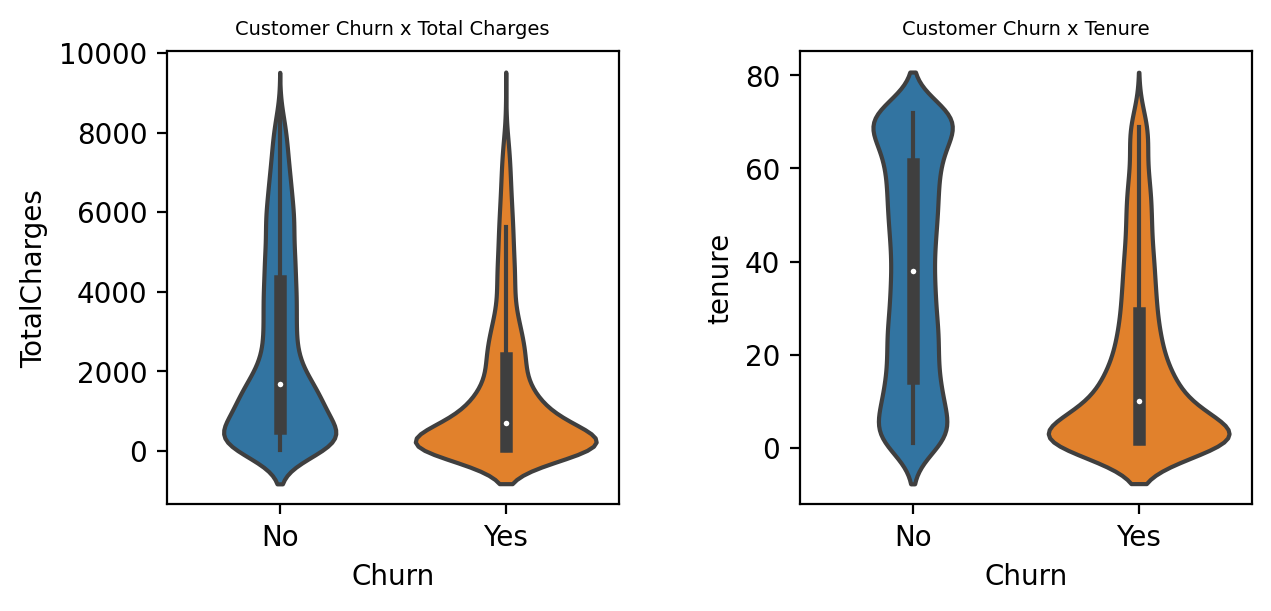

In [13]:
fig, axs = plt.subplots(1,2,figsize=(7,3),dpi=200)

sns.violinplot(x="Churn",y="TotalCharges",data=df,ax=axs[0])
axs[0].set_title("Customer Churn x Total Charges",fontsize=7)


sns.violinplot(x="Churn",y="tenure",data=df,ax=axs[1])
axs[1].set_title("Customer Churn x Tenure",fontsize=7)

plt.subplots_adjust(wspace=0.4)
plt.show()

Looking at the violin plot above on the left, we can see that the plot is positively skewed with the majority of customers who left the company paying total charges of approximately \\$2,000 or less. Reconciling this observation with the violin plot on the right, we can see that the plot is also positively skewed with most customers leaving the company within 20 months or less. This makes sense as the total charges of customers who leave earlier will, on average, be less than those who stay with the company longer

Contract Stats:
Month-to-month contract stats:

	Total month to month customers: 3875, % of total customers: 55.11%
 		Month to month % | Churn = Yes: 42.71%
 		Month to month % | Churn = No: 57.29%

--------------------------------------------------------------------------------
One year contract stats:

	Total one year contract customers: 1472, % of total customers: 20.93%
 		One year % | Churn = Yes: 11.28%
 		One year % | Churn = No: 88.72%

--------------------------------------------------------------------------------
Two year contract stats:

	Total two year contract customers: 1472, % of total customers: 23.96%
 		Two year % | Churn = Yes: 2.85%
 		Two year % | Churn = No: 97.15%



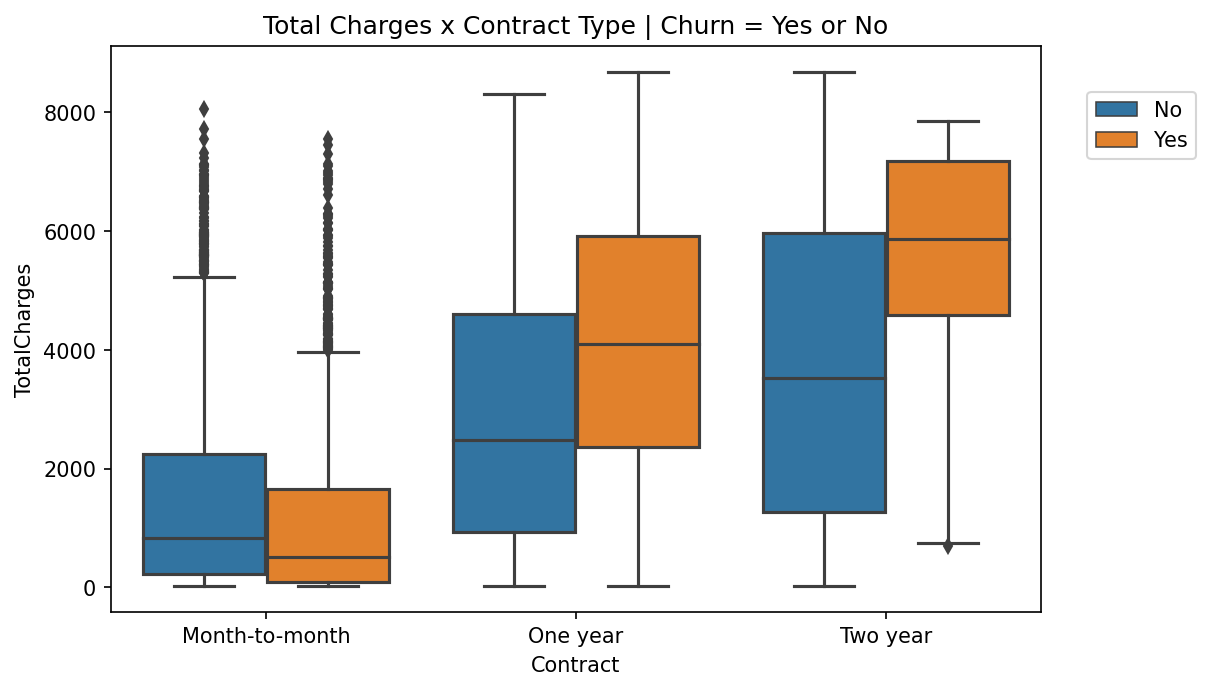

In [14]:
# computing and displaying contract x churn stats
month_to_month = df["Contract"].value_counts()["Month-to-month"]
month_to_month_churn_yes = df[["Contract","Churn"]].value_counts()["Month-to-month"]["Yes"]
month_to_month_churn_no = df[["Contract","Churn"]].value_counts()["Month-to-month"]["No"]

one_year = df["Contract"].value_counts()["One year"]
one_year_churn_yes = df[["Contract","Churn"]].value_counts()["One year"]["Yes"]
one_year_churn_no = df[["Contract","Churn"]].value_counts()["One year"]["No"]

two_year = df["Contract"].value_counts()["Two year"]
two_year_churn_yes = df[["Contract","Churn"]].value_counts()["Two year"]["Yes"]
two_year_churn_no = df[["Contract","Churn"]].value_counts()["Two year"]["No"]

print("="*80)
print("Contract Stats:")
print("="*80)

print("Month-to-month contract stats:\n")
print(f"\tTotal month to month customers: {month_to_month},", f"% of total customers: {round(month_to_month / len(df)*100,2)}%\n",
      f"\t\tMonth to month % | Churn = Yes: {round(month_to_month_churn_yes / month_to_month*100,2)}%\n",
     f"\t\tMonth to month % | Churn = No: {round(month_to_month_churn_no / month_to_month*100,2)}%\n")

print("-"*80)
print("One year contract stats:\n")
print(f"\tTotal one year contract customers: {one_year},", f"% of total customers: {round(one_year / len(df)*100,2)}%\n",
     f"\t\tOne year % | Churn = Yes: {round(one_year_churn_yes/one_year*100,2)}%\n",
     f"\t\tOne year % | Churn = No: {round(one_year_churn_no/one_year*100,2)}%\n")

print("-"*80)
print("Two year contract stats:\n")
print(f"\tTotal two year contract customers: {one_year},",f"% of total customers: {round(two_year / len(df)*100,2)}%\n",
     f"\t\tTwo year % | Churn = Yes: {round(two_year_churn_yes/two_year*100,2)}%\n",
     f"\t\tTwo year % | Churn = No: {round(two_year_churn_no/two_year*100,2)}%\n")

print("="*80)

# visualizing boxplot for each contract type 
plt.figure(figsize=(8,5),dpi=150)
sns.boxplot(x="Contract",y="TotalCharges",hue="Churn",data=df)
plt.title("Total Charges x Contract Type | Churn = Yes or No",fontsize=12)
plt.legend(loc=(1.05,0.8))

plt.show()

The boxplot above shows the total charges incurred by customers based on what contract type they are on and displays the proportion of churn for each segment. 

There are several insights we can extract from the computed stats and plot:
- The month to month customers make up 55.11% of all customers, whereas customers with one or two year contracts only make up 20.93% and 23.96% respectively of all customers
- Of those month-to-month customers, 57.29% of them end up leaving the company. That is, over half of the company's month to month customers end up eventually leaving the company. If we look at the respective churn rates for customers with one or two year contracts, you'll see that they decrease substantially, making up only 11.28% and 2.85% respectively of customers who leave the company. That is, of the customers who are not month to month (one year + two year = 44.83%), only roughly 3% ( (20.93% * 11.28%) + (23.96% * 2.85%) ) of them end up leaving the company. That means that roughly 97% of customers with a one or two year contract end up staying with the company
- Looking at the plots, we can clearly see a disparity between the month to month boxplot and the contract boxplots. This includes differences in how the distributions are skewed, where month to month customers are heavily skewed in a shorter time horizon, whereas the distributions for the two other contract options are relatively even. This makes sense, as customers who opt in for the monthly option are likely doing so because they only want the service for a short period of time. But what about when these customers cross that 12 month point? Can we convert them into contract customers, since it has been already established that they would like to use the service for a longer timeframe?
- The other clear difference is the presence of outliers in the month to month plot. This means that although the majority of month to month customers are short lived, there are several month to month customers who do end up staying with the company for longer periods. In fact, the outliers represent roughly 3.65% of the month to month customer segment. That means that the company is likely losing out on additional revenues from 3.65% of their month to month customer segment that make up roughly 2% of all their customers that they may be able to convert into contract customers. Based on the data we have about customers who opted for the one or two year contracts, we can see that this would decrease the likelihood of them leaving substantially

The predictive modeling section will discuss methods we can apply to predict whether a customer will leave the company or not later, but, one question to ask is can the company introduce some form of incentive, be it a promotional discount or other perks that would increase the likelihood of keeping a customer once they've identified a high likelihood of the customer potentially leaving the company?

In [15]:
# creating df with dummies and merging back with df with no dummies to perform correlation analysis of features
df_dummies = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure']])

df_not_dummies = df.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure'],axis=1)

df_not_dummies = df_not_dummies["Churn"].map({"Yes":1,"No":0})

df_dummies_merged = pd.concat([df_dummies,df_not_dummies],axis=1)

correl = df_dummies_merged.corr()["Churn"][:-1].sort_values()

print("="*55)
print("Feature Correlation | Churn = Yes:")
print("="*55)
print(correl)
print("="*55)

Feature Correlation | Churn = Yes:
tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
OnlineBackup_No internet service          -0.227578
TechSupport_No internet service           -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check   

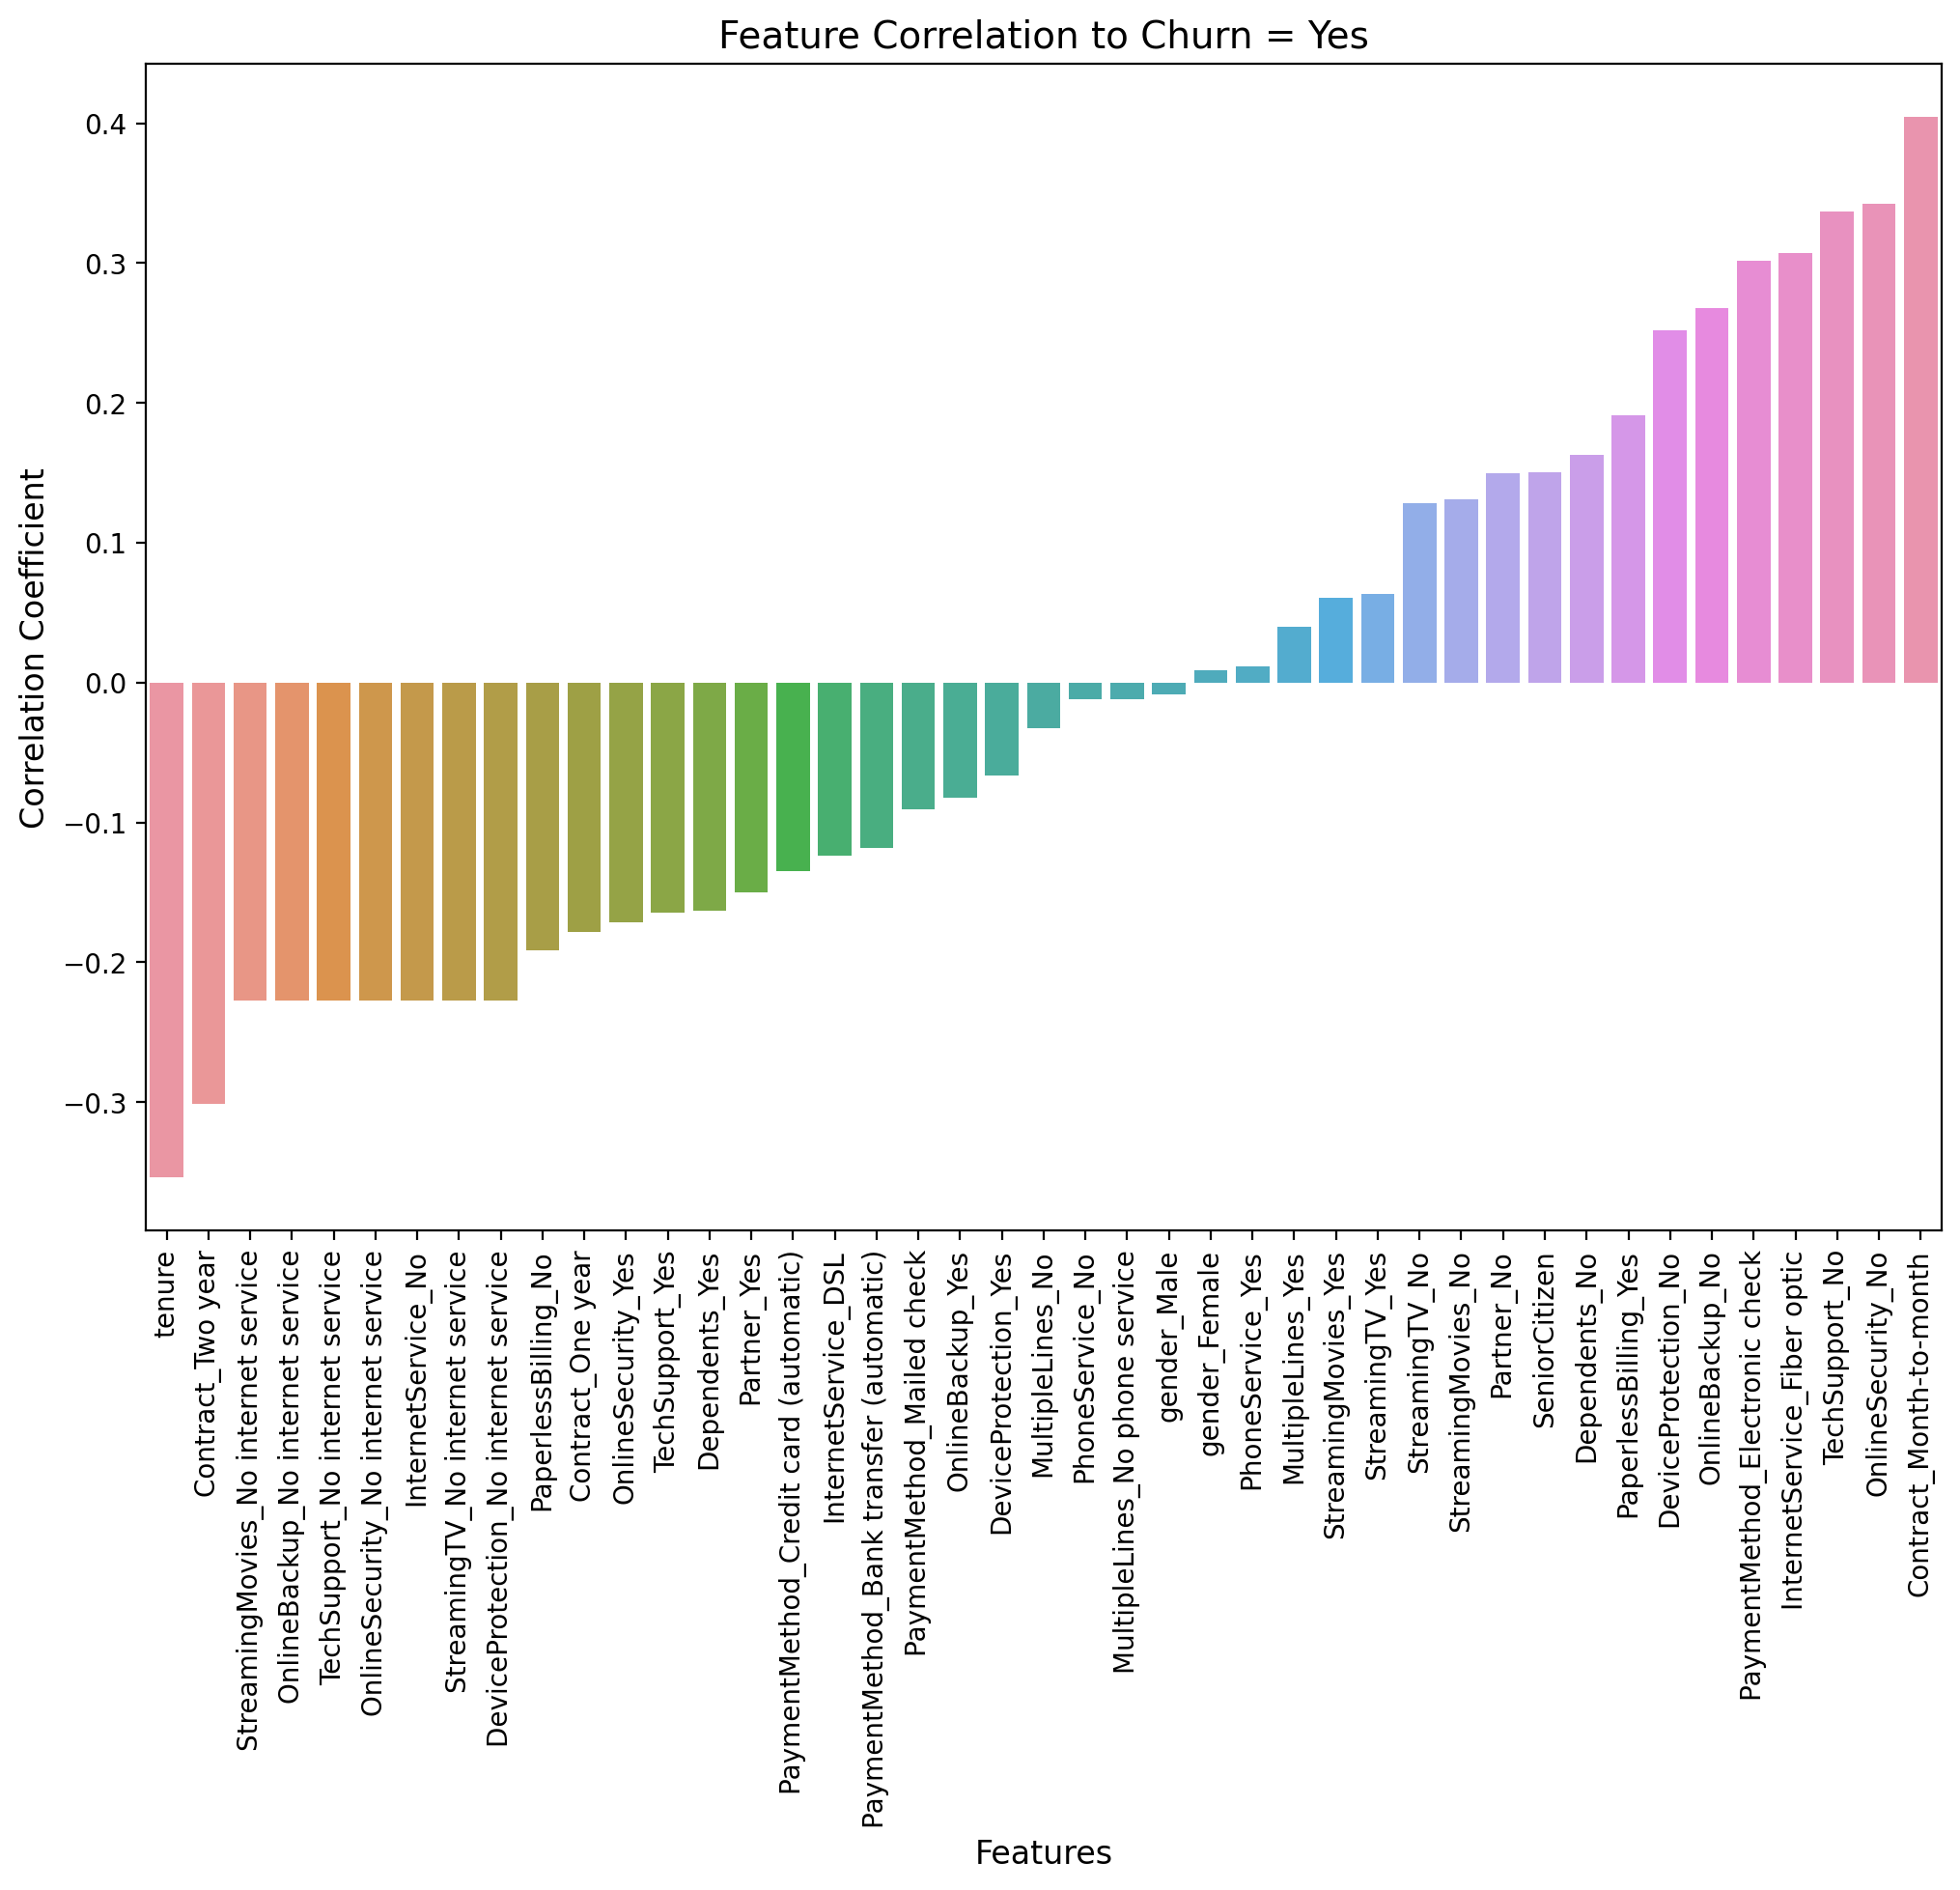

In [16]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=correl.index,y=correl)

plt.title("Feature Correlation to Churn = Yes", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)

plt.xticks(rotation=90)

plt.show()

Looking at the barplot above, we can see how the features are correlated to customer churn:
- On the left side, you see that tenure and two year contracts are the most negatively correlated to churn. As we've seen earlier, this makes sense, as the longer the customer stays with the company, the less likely they are to leave. This likelihood is decreased even further when the customer is locked into either a one or two year contract
- It also appears to be a case that if a customer opts in for online security, tech support (not including tech support for internet services), has dependents and still has their bills sent in the mail, where the accounts are paid automatically through a credit card, through their bank account or a mailed check, that they are more likely to stay with the company longer. These features coincide with a traditional family, where the parents cover all the expenses of their dependent children who are likely still very young. Parents are likely not as tech savvy and have the additional disposable income to opt in for additional security services. They also seem to prefer having paper copies for possible record keeping purposes, but since they're also likely to be customers on either the one or two year contract, they have setup some form of automatic payment method in place to either qualify for an additional discount on their services or to just automate the process, so they don't need to take time out of their likely busy schedule to do so
- On the right side, we can see that customers who paid month to month showed the highest correlation to churn
- For the other features on the right side, it seems that they are the opposite of the features on the left side. Here, we have individuals who are single and have no children. They didn't opt in for any device protection, tech support, online security, online backups, etc., which might signify that they're tech savvy users or can't justify the additional price for the service. These users also have their bills electronically sent to them and pay them via online check, suggesting that this represents a younger crowd

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

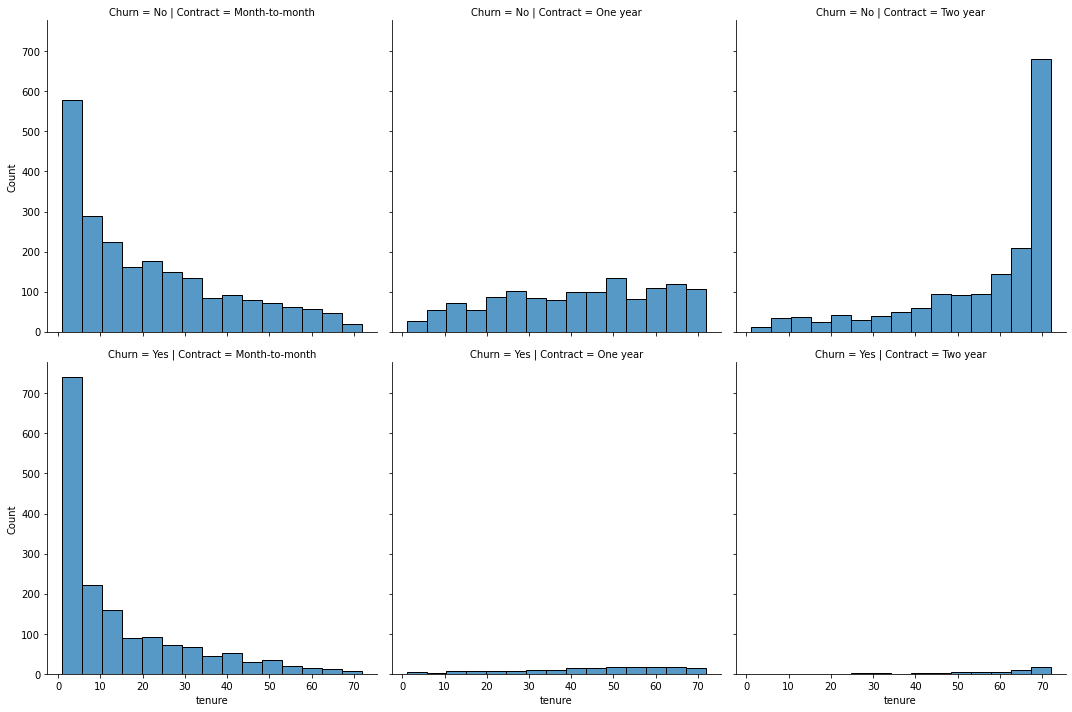

In [18]:
plt.figure(dpi=200)
sns.displot(x="tenure",data=df,row="Churn",col="Contract")

plt.show();

The distribution plot above shows the distributions of how long a customer stays with the company segmented by contract type. Looking at the dist. plot, we can see some of our previous remarks being confirmed:
- There is a high turnover of customers on the month to month plan in the early months (0-10). It is likely that these customers chose the month to month option because they weren't expecting to use the services for longer than a few months for whatever reason, and there would be no incentive that could be provided to convince them to stay. However, for customers that stay beyond the initial year, there may be some incentive that could convince them to adopt a contract 
- The split of customers paying month to month who decide to leave is also very even
- When looking at the customers on the contract plan, we again see that only a very small percentage of the customers decide to leave the company, creating a high retention rate amongst this segment

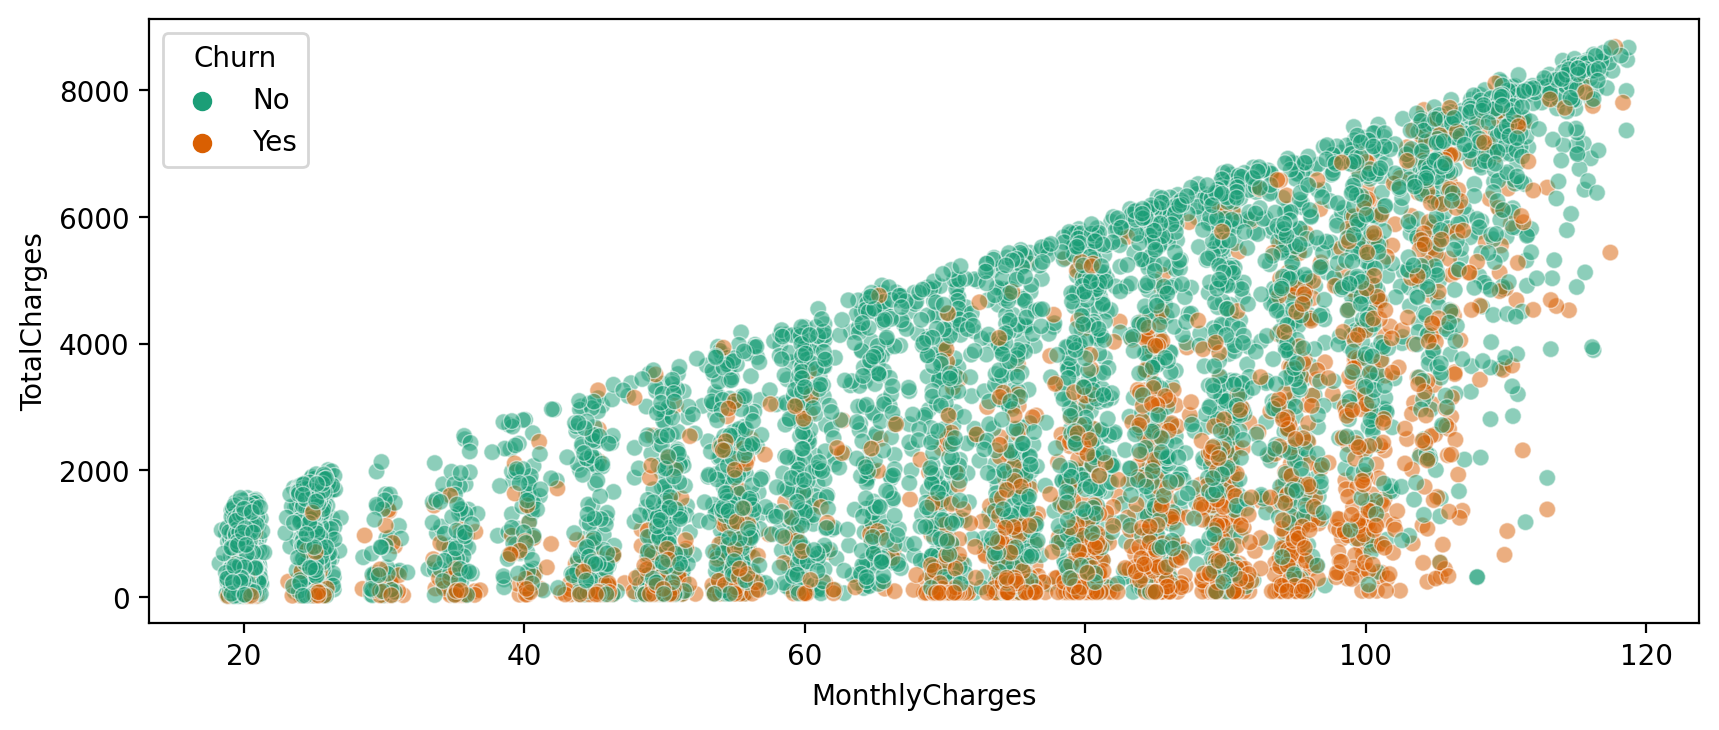

In [19]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

plt.show()

There is a pattern that shows customers who stay with the company to pay more in total charges

In [20]:
# group the different tenures together to see if there is a pattern between tenure x TotalCharges
def group_tenures(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [21]:
df['Tenure Group'] = df['tenure'].apply(group_tenures)

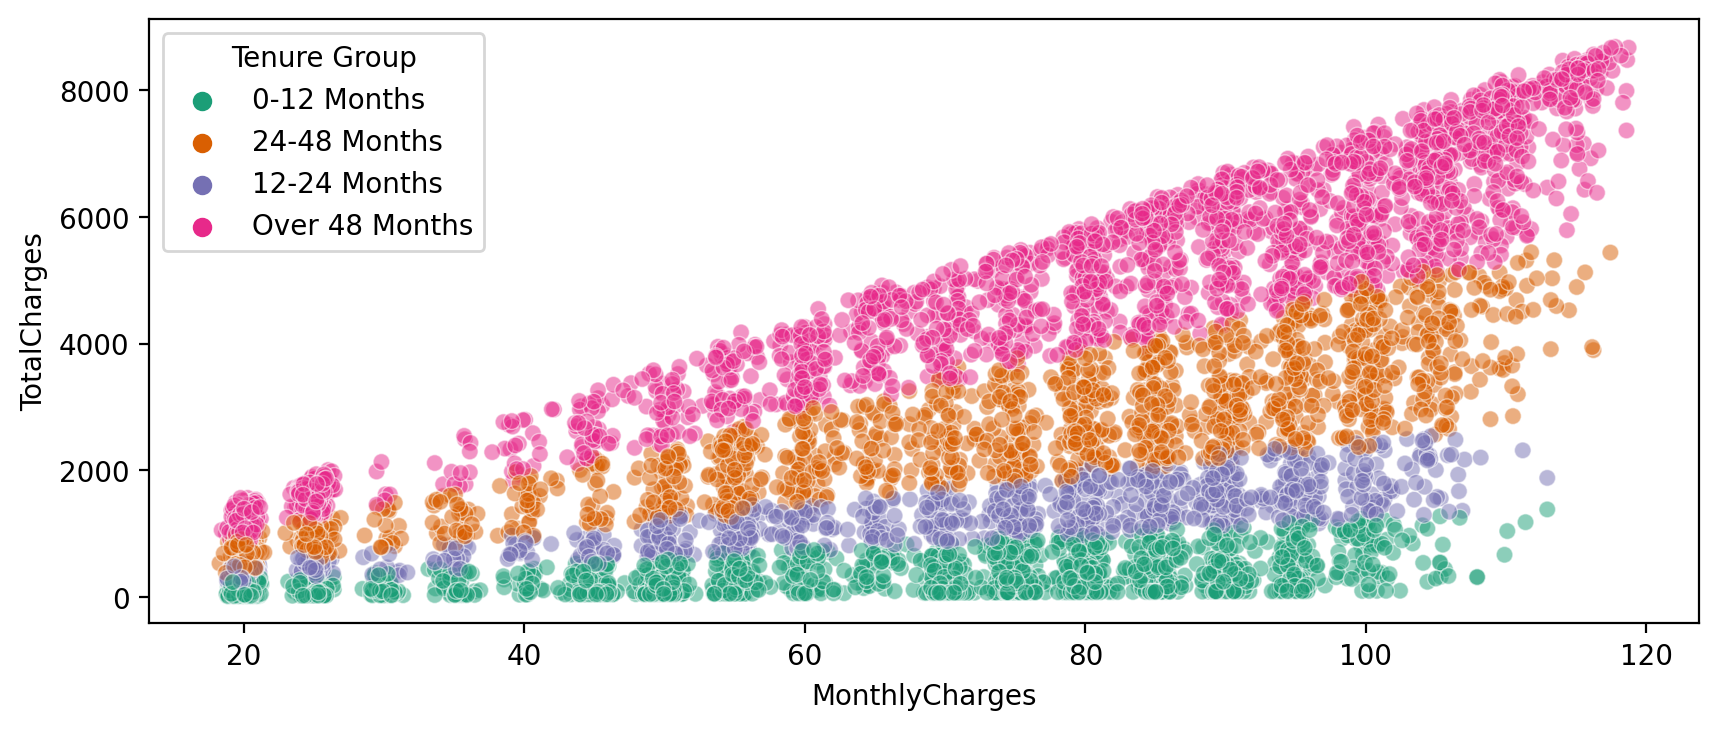

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Group', 
                linewidth=0.5,alpha=0.5,palette='Dark2')

plt.show();

We can see that pattern (greater total charges if customer stays longer) more clearly when we segment the customers based on tenure group

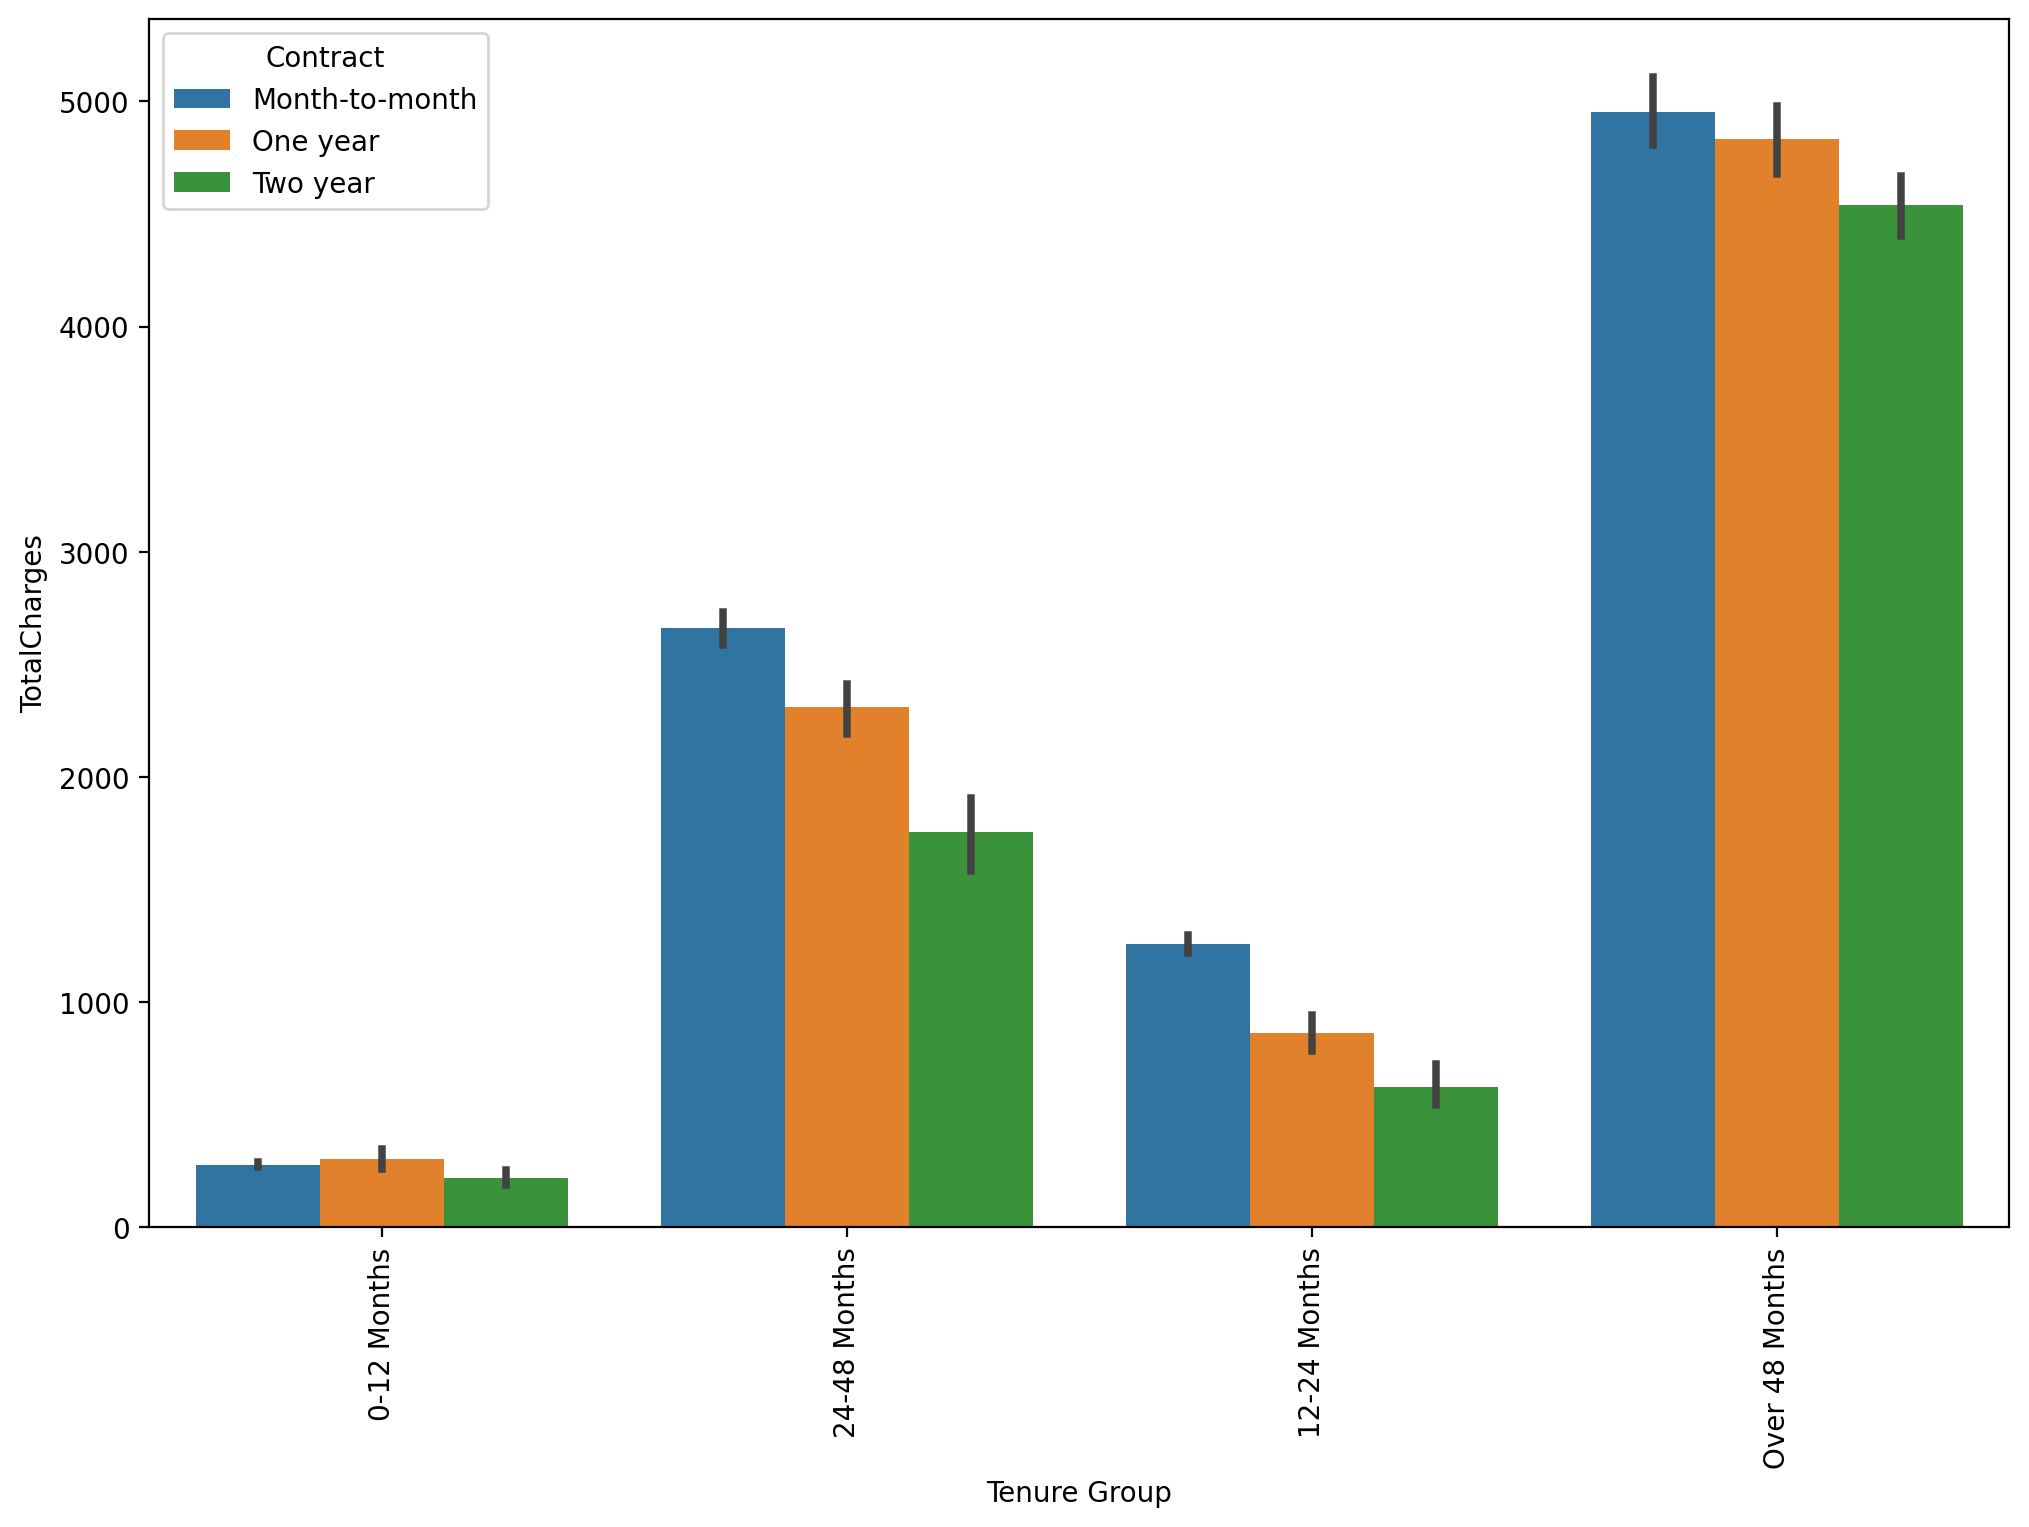

In [23]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x="Tenure Group",y="TotalCharges",data=df,hue="Contract")

plt.xticks(rotation=90)

plt.show();

If we segment the customers based on contract type in each tenure bucket, we can see that linear relationship holds, irrespective of what contract the customer has

<Figure size 2000x800 with 0 Axes>

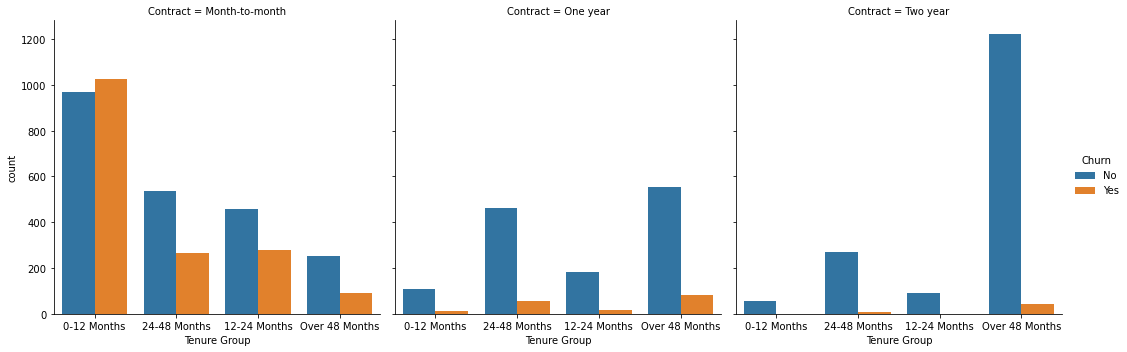

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Group',hue='Churn',col='Contract',kind='count')

plt.show();

The catplot above segments the customers by contract type and each plot further groups customers by tenure group and displays the count plot of whether they ended up leaving or not. Again we see the same insights. Customers with contracts are less likely to leave irrespective of which time horizon you look at, whereas, customers who pay month to month have very high attrition rates

### Predictive Modeling:

In [107]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [26]:
# splitting numeric data from categorical data to get dummies for categorical data
df_numeric_data = data[["MonthlyCharges","TotalCharges"]]
df_categorical_data = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

# getting dummies for categorical data
df_categorical_data = pd.get_dummies(df_categorical_data,drop_first=True)
# converting y-label (column intended to predict) from yes and no to binary 1,0 for the ML algo to work
churn_col = df["Churn"].map({"Yes":1,"No":0})
# concatenating both dataframes to each other
ml_df = pd.concat([df_numeric_data,df_categorical_data,churn_col],axis=1)

The data in the X variable represents all the features in the dataset that will be used to predict our y-label (Churn column). The reason we are trying to predict the Churn column is if we can accurately identify which customers are highly likely to churn based on a given feature profile, we may be able to retain the customer by incentivising them in some form (e.g. discounts, add ons, additional features, etc.)

In [33]:
X = ml_df.drop("Churn", axis=1)
y = ml_df["Churn"]

The data will be split into a training and testing set in the following cell. To be able to get a "fair" depiction of how our model performs, we will create a evaluation dataset, which will be used to tune hyperparameters via cross validation. Once a satisfactory model has been obtained, it will be tested on a holdout test set to roughly approximate performance on unknown data

In [34]:
# the test size for this data will be 20% (10% for evaluation and 10% for the holdout test set)
test_size = 0.2

# splitting the data to training and evaluation data sets
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=test_size, random_state=42)

# splitting half of the evaluation data to get the holdout test set
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

The data will be scaled in the following cell. The reason why we only fit to the training data is because the fit method gathers statistical attributes about the data and to prevent data leakage, we only want to scale the data using the statistical attributes of the training data. Otherwise, your model would already have some information about your test set resulting in high variance and poor generalization to new data

In [35]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

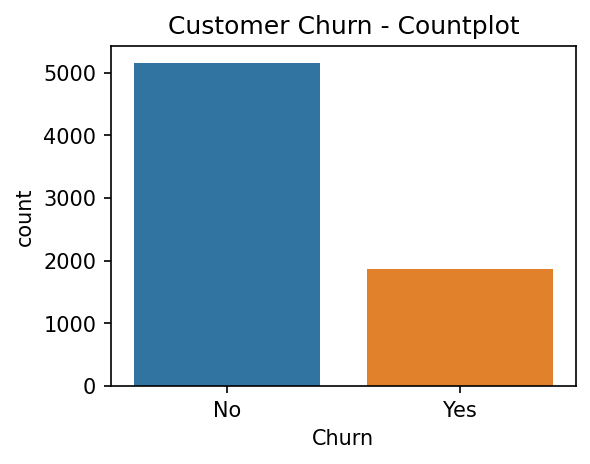

In [37]:
# Visualizing countplot to show that we are dealing with an imbalanced class
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="Churn",data=df)
plt.title("Customer Churn - Countplot",fontsize=12)

plt.show();

The countplot above shows that we are dealing with a imbalanced dataset, as the number of data points we have for the "Yes" outcome is much smaller than the number of data points available for the "No" outcome. As a result, this will require some hyperparameter tuning to ensure that our machine learning model doesn't fall victim to the accuracy paradox. The accuracy paradox is where the model looks like it is performing well due to a high accuracy score, however, this is largely due to the data being skewed to the result with the most data points. For example, if we had a model that only predicted "No" for every data point, where the "No" outcome made up 95% of the data, then out model would be "accurate" 95% of the time, which is not really what is happening

In [231]:
# helper functions
def preparing_ml_data(df,ts=0.2):
        X = df.drop("Churn", axis=1)
        y = df["Churn"]
        
        # the test size for this data will be 20% (10% for evaluation and 10% for the holdout test set)
        test_size = ts

        # splitting the data to training and evaluation data sets
        X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=test_size, random_state=42)

        # splitting half of the evaluation data to get the holdout test set
        X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)                
        
        # scaling the data
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)
        X_eval = scaler.transform(X_eval)
        X_test = scaler.transform(X_test)
        
        return X_train, y_train, X_eval, y_eval, X_test, y_test

def evaluate_model(grid_model, X_test, y_test, prediction):
    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    plt.figure(figsize=(6,3),dpi=150)
    plot_confusion_matrix(grid_model, X_test, y_test)
    plt.show();
    
def model_output(model_name, grid_model):
    print("="*100)
    print(model_name + " MODEL PARAMETERS")
    print("="*100)
    print("Best Parameters:\n\n",grid_model.best_params_,"\n")
    print("Best Model:\n\n",grid_model.best_estimator_,"\n")
    print("-"*100,"\n")

    print("="*100)
    print("PERFORMANCE METRICS")
    print("="*100)

    print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
    print("-"*100)
    prediction_eval = grid_model.predict(X_eval)
    evaluate_model(grid_model, X_eval, y_eval, prediction_eval)
    print("-"*100)

    print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
    print("-"*100)
    prediction_test = grid_model.predict(X_test)
    final_metrics = evaluate_model(grid_model, X_test, y_test, prediction_test)
    print("-"*100)
    print("="*100)

In [228]:
base_log_model = LogisticRegression()
log_param_grid = {
    "C":np.logspace(-4,4,50),
    "penalty":["l1","l2","elasticnet","none"],
    "fit_intercept":[True,False],
    "class_weight":["balanced"],
    "max_iter":[10_000_000],
    "l1_ratio":[0,0.1,0.5,0.7,0.9,0.95,0.99,1],
    "random_state":[42],
    "verbose":[0]
}
log_grid_model = GridSearchCV(base_log_model, param_grid=log_param_grid)
log_grid_model.fit(X_train, y_train)

KeyboardInterrupt: 

LOG MODEL PARAMETERS
Best Parameters:

 {'C': 0.02811768697974228, 'class_weight': 'balanced', 'fit_intercept': True, 'l1_ratio': 0, 'max_iter': 10000000, 'penalty': 'l2', 'random_state': 42, 'verbose': 0} 

Best Model:

 LogisticRegression(C=0.02811768697974228, class_weight='balanced', l1_ratio=0,
                   max_iter=10000000, random_state=42) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       528
           1       0.50      0.80      0.61       175

    accuracy                           0.75       703
   macro avg       0.71      0.77      0.71       703
weighted avg       0.81      0.75      0.76       703

[[387 141]
 [ 35 140]]


<Figure size 900x450 with 0 Axes>

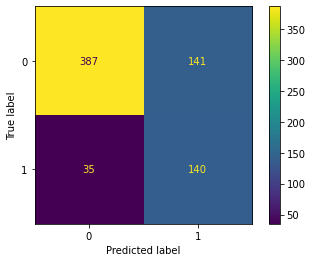

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       505
           1       0.49      0.77      0.60       199

    accuracy                           0.71       704
   macro avg       0.69      0.73      0.69       704
weighted avg       0.77      0.71      0.72       704

[[346 159]
 [ 45 154]]


<Figure size 900x450 with 0 Axes>

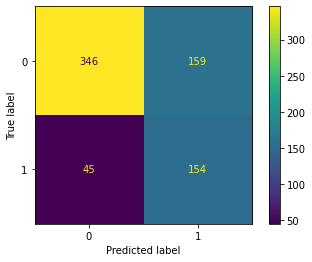

----------------------------------------------------------------------------------------------------


In [126]:
print("="*100)
print("LOG MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",log_grid_model.best_params_,"\n")
print("Best Model:\n\n",log_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
log_prediction_eval = log_grid_model.predict(X_eval)
evaluate_model(log_grid_model, X_eval, y_eval, log_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
log_prediction_test = log_grid_model.predict(X_test)
log_final_metrics = evaluate_model(log_grid_model, X_test, y_test, log_prediction_test)
print("-"*100)
print("="*100)

In [136]:
base_RFC_model = RandomForestClassifier()
RFC_param_grid = {
    "n_estimators":[10,20,50,64,100,124],
    "criterion":["gini","entropy"],
    "max_features":["auto"],
    "bootstrap":[True],
    "random_state":[42],
    "class_weight":["balanced"]
}
RFC_grid_model = GridSearchCV(base_RFC_model,param_grid=RFC_param_grid)
RFC_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto'],
                         'n_estimators': [10, 20, 50, 64, 100, 124],
                         'random_state': [42]})

RFC MODEL PARAMETERS
Best Parameters:

 {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 124, 'random_state': 42} 

Best Model:

 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=124, random_state=42) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       528
           1       0.63      0.48      0.55       175

    accuracy                           0.80       703
   macro avg       0.74      0.69      0.71       703
weighted avg       0.79      0.80      0.79       703

[[479  49]
 [ 91  84]]


<Figure size 900x450 with 0 Axes>

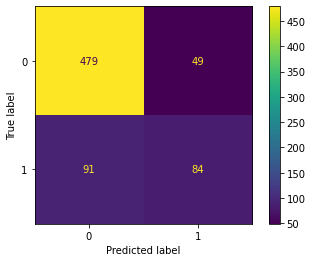

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       505
           1       0.62      0.43      0.51       199

    accuracy                           0.77       704
   macro avg       0.71      0.66      0.68       704
weighted avg       0.75      0.77      0.75       704

[[453  52]
 [113  86]]


<Figure size 900x450 with 0 Axes>

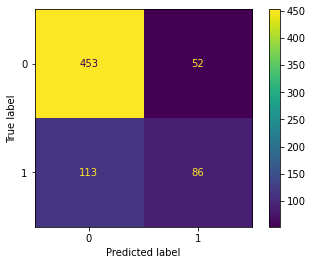

----------------------------------------------------------------------------------------------------


In [137]:
print("="*100)
print("RFC MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",RFC_grid_model.best_params_,"\n")
print("Best Model:\n\n",RFC_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
RFC_prediction_eval = RFC_grid_model.predict(X_eval)
evaluate_model(RFC_grid_model, X_eval, y_eval, RFC_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
RFC_prediction_test = RFC_grid_model.predict(X_test)
RFC_final_metrics = evaluate_model(RFC_grid_model, X_test, y_test, RFC_prediction_test)
print("-"*100)
print("="*100)

In [148]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_eval)
    
    err = 1 - accuracy_score(y_eval, predictions)
    
    error_rates.append(err)

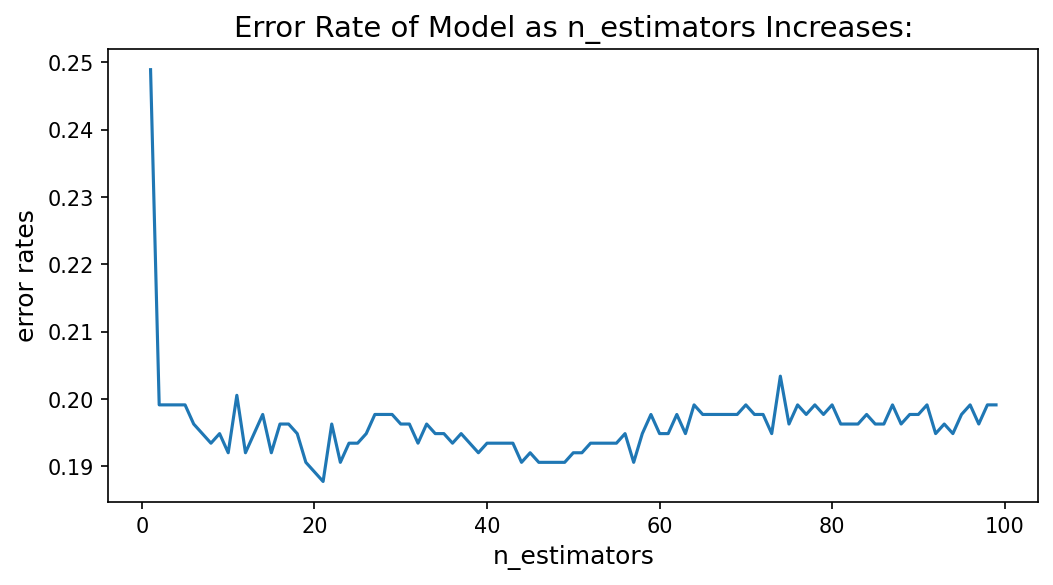

In [149]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(range(1,100),error_rates)

plt.title("Error Rate of Model as n_estimators Increases:", fontsize=14)
plt.xlabel("n_estimators",fontsize=12)
plt.ylabel("error rates", fontsize=12)

plt.show()

The graph above shows that the error stabilizes between roughly 15 and 20 n_estimators. This is the range we will use when setting up our cross validation parameter grid

In [150]:
base_ada_model = AdaBoostClassifier()
ada_param_grid = {
    "n_estimators":range(15,20),
    "learning_rate":[0.1,0.01,0.001,0.0001],
}
ada_grid_model = GridSearchCV(base_ada_model,param_grid=ada_param_grid)
ada_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': range(15, 20)})

ADA MODEL PARAMETERS
Best Parameters:

 {'learning_rate': 0.1, 'n_estimators': 19} 

Best Model:

 AdaBoostClassifier(learning_rate=0.1, n_estimators=19) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       528
           1       0.79      0.19      0.30       175

    accuracy                           0.79       703
   macro avg       0.79      0.59      0.59       703
weighted avg       0.79      0.79      0.73       703

[[519   9]
 [142  33]]


<Figure size 900x450 with 0 Axes>

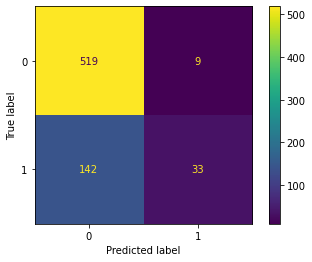

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       505
           1       0.80      0.20      0.31       199

    accuracy                           0.76       704
   macro avg       0.78      0.59      0.58       704
weighted avg       0.77      0.76      0.70       704

[[495  10]
 [160  39]]


<Figure size 900x450 with 0 Axes>

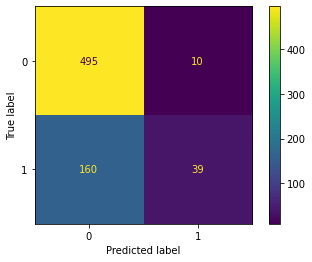

----------------------------------------------------------------------------------------------------


In [151]:
print("="*100)
print("ADA MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",ada_grid_model.best_params_,"\n")
print("Best Model:\n\n",ada_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
ada_prediction_eval = ada_grid_model.predict(X_eval)
evaluate_model(ada_grid_model, X_eval, y_eval, ada_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
ada_prediction_test = ada_grid_model.predict(X_test)
ada_final_metrics = evaluate_model(ada_grid_model, X_test, y_test, ada_prediction_test)
print("-"*100)
print("="*100)

In [152]:
base_ada_model = AdaBoostClassifier()
ada_param_grid = {
    "n_estimators":range(1,100),
    "learning_rate":[0.1,0.01,0.001,0.0001],
}
ada_grid_model = GridSearchCV(base_ada_model,param_grid=ada_param_grid)
ada_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': range(1, 100)})

ADA MODEL PARAMETERS
Best Parameters:

 {'learning_rate': 0.1, 'n_estimators': 98} 

Best Model:

 AdaBoostClassifier(learning_rate=0.1, n_estimators=98) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       528
           1       0.67      0.41      0.51       175

    accuracy                           0.80       703
   macro avg       0.75      0.67      0.69       703
weighted avg       0.79      0.80      0.78       703

[[493  35]
 [104  71]]


<Figure size 900x450 with 0 Axes>

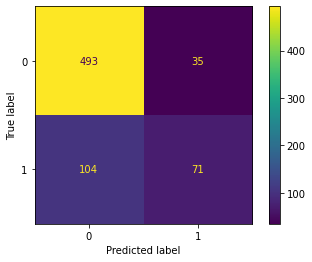

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       505
           1       0.68      0.40      0.50       199

    accuracy                           0.78       704
   macro avg       0.74      0.66      0.68       704
weighted avg       0.76      0.78      0.76       704

[[468  37]
 [120  79]]


<Figure size 900x450 with 0 Axes>

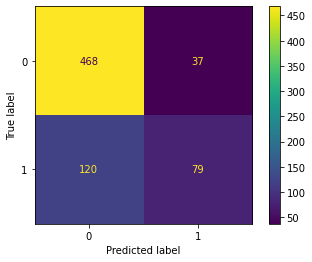

----------------------------------------------------------------------------------------------------


In [153]:
print("="*100)
print("ADA MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",ada_grid_model.best_params_,"\n")
print("Best Model:\n\n",ada_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
ada_prediction_eval = ada_grid_model.predict(X_eval)
evaluate_model(ada_grid_model, X_eval, y_eval, ada_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
ada_prediction_test = ada_grid_model.predict(X_test)
ada_final_metrics = evaluate_model(ada_grid_model, X_test, y_test, ada_prediction_test)
print("-"*100)
print("="*100)

In [155]:
base_gb_model = GradientBoostingClassifier()
gb_param_grid = {
    "n_estimators":range(1,100),
    "learning_rate":[0.1,0.05,0.2],
    "max_depth":[3,4,5]
}
gb_grid_model = GridSearchCV(base_gb_model,param_grid=gb_param_grid)
gb_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': range(1, 100)})

GB MODEL PARAMETERS
Best Parameters:

 {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 55} 

Best Model:

 GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=55) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       528
           1       0.71      0.50      0.59       175

    accuracy                           0.83       703
   macro avg       0.78      0.72      0.74       703
weighted avg       0.81      0.83      0.81       703

[[492  36]
 [ 87  88]]


<Figure size 900x450 with 0 Axes>

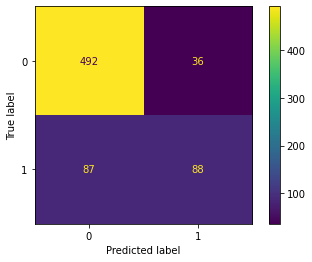

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       505
           1       0.67      0.47      0.55       199

    accuracy                           0.78       704
   macro avg       0.74      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

[[459  46]
 [106  93]]


<Figure size 900x450 with 0 Axes>

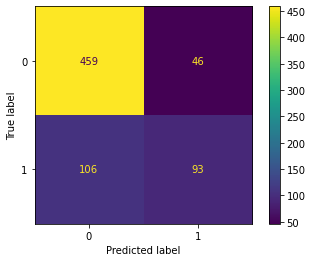

----------------------------------------------------------------------------------------------------


In [156]:
print("="*100)
print("GB MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",gb_grid_model.best_params_,"\n")
print("Best Model:\n\n",gb_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
gb_prediction_eval = gb_grid_model.predict(X_eval)
evaluate_model(gb_grid_model, X_eval, y_eval, gb_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
gb_prediction_test = gb_grid_model.predict(X_test)
gb_final_metrics = evaluate_model(gb_grid_model, X_test, y_test, gb_prediction_test)
print("-"*100)
print("="*100)

### Downsampling data and re-training models:

Because we are dealing with an imbalanced class here, downsampling the majority "No" class might be able to give us greater accuracy with predicting when customer churn, as of now, the precision and recall for these values is poor compared the "No" class.

In [169]:
from sklearn.utils import resample
churn_downsample = resample(ml_df[ml_df["Churn"] == 0],
             replace=True,
             n_samples=len(ml_df[ml_df["Churn"] == 1]),
             random_state=42)

print(churn_downsample.shape)

(1869, 31)


In [178]:
not_churn_downsample = ml_df[ml_df["Churn"] == 1]
print(not_churn_downsample.shape)

(1869, 31)


In [202]:
# test to check if the concatenation was successful
x_val = churn_downsample.shape[0] + not_churn_downsample.shape[0] 
y_val = not_churn_downsample.shape[1]

downsampled_df = pd.concat([churn_downsample,not_churn_downsample],axis=0)
if downsampled_df.shape == (x_val, y_val):
    print("Success, same shape!")
else:
    print("Error!")

Success, same shape!


In [209]:
# setup data with helper function
X_train, y_train, X_eval, y_eval, X_test, y_test = preparing_ml_data(downsampled_df,0.2)

In [213]:
ds_base_log_model = LogisticRegression()
ds_log_param_grid = {
    "C":np.logspace(-4,4,50),
    "penalty":["l1","l2","elasticnet","none"],
    "fit_intercept":[True,False],
    "max_iter":[10_000_000],
    "l1_ratio":[0,0.1,0.5,0.7,0.9,0.95,0.99,1],
    "random_state":[42],
    "verbose":[0]
}
ds_log_grid_model = GridSearchCV(ds_base_log_model, param_grid=ds_log_param_grid)
ds_log_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-0...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False],
                         'l1_ratio': [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                         'max_iter': [10000000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [42], 'verbose': [0]})

LOG MODEL PARAMETERS
Best Parameters:

 {'C': 0.18420699693267145, 'fit_intercept': True, 'l1_ratio': 0, 'max_iter': 10000000, 'penalty': 'l2', 'random_state': 42, 'verbose': 0} 

Best Model:

 LogisticRegression(C=0.18420699693267145, l1_ratio=0, max_iter=10000000,
                   random_state=42) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       181
           1       0.74      0.79      0.76       193

    accuracy                           0.75       374
   macro avg       0.75      0.74      0.74       374
weighted avg       0.75      0.75      0.75       374

[[127  54]
 [ 41 152]]


<Figure size 900x450 with 0 Axes>

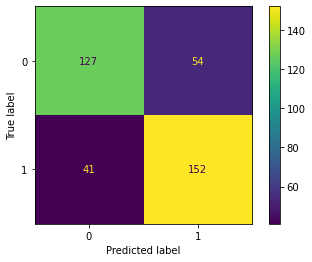

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       198
           1       0.71      0.80      0.75       176

    accuracy                           0.75       374
   macro avg       0.76      0.76      0.75       374
weighted avg       0.76      0.75      0.75       374

[[141  57]
 [ 35 141]]


<Figure size 900x450 with 0 Axes>

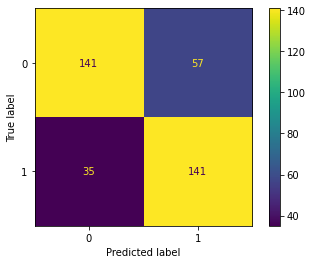

----------------------------------------------------------------------------------------------------


In [214]:
print("="*100)
print("LOG MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",ds_log_grid_model.best_params_,"\n")
print("Best Model:\n\n",ds_log_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
ds_log_prediction_eval = ds_log_grid_model.predict(X_eval)
evaluate_model(ds_log_grid_model, X_eval, y_eval, ds_log_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
ds_log_prediction_test = ds_log_grid_model.predict(X_test)
ds_log_final_metrics = evaluate_model(ds_log_grid_model, X_test, y_test, ds_log_prediction_test)
print("-"*100)
print("="*100)

In [215]:
ds_base_RFC_model = RandomForestClassifier()
ds_RFC_param_grid = {
    "n_estimators":[10,20,50,64,100,124],
    "criterion":["gini","entropy"],
    "max_features":["auto"],
    "bootstrap":[True],
    "random_state":[42],
}
ds_RFC_grid_model = GridSearchCV(ds_base_RFC_model,param_grid=ds_RFC_param_grid)
ds_RFC_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_features': ['auto'],
                         'n_estimators': [10, 20, 50, 64, 100, 124],
                         'random_state': [42]})

RFC MODEL PARAMETERS
Best Parameters:

 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 64, 'random_state': 42} 

Best Model:

 RandomForestClassifier(criterion='entropy', n_estimators=64, random_state=42) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       181
           1       0.78      0.76      0.77       193

    accuracy                           0.76       374
   macro avg       0.76      0.76      0.76       374
weighted avg       0.76      0.76      0.76       374

[[139  42]
 [ 46 147]]


<Figure size 900x450 with 0 Axes>

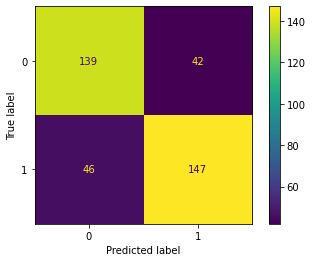

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       198
           1       0.77      0.78      0.78       176

    accuracy                           0.79       374
   macro avg       0.79      0.79      0.79       374
weighted avg       0.79      0.79      0.79       374

[[158  40]
 [ 39 137]]


<Figure size 900x450 with 0 Axes>

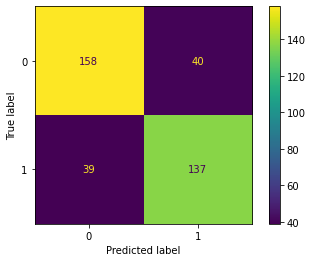

----------------------------------------------------------------------------------------------------


In [216]:
print("="*100)
print("RFC MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",ds_RFC_grid_model.best_params_,"\n")
print("Best Model:\n\n",ds_RFC_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
ds_RFC_prediction_eval = ds_RFC_grid_model.predict(X_eval)
evaluate_model(ds_RFC_grid_model, X_eval, y_eval, ds_RFC_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
ds_RFC_prediction_test = ds_RFC_grid_model.predict(X_test)
ds_RFC_final_metrics = evaluate_model(ds_RFC_grid_model, X_test, y_test, ds_RFC_prediction_test)
print("-"*100)
print("="*100)

In [217]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_eval)
    
    err = 1 - accuracy_score(y_eval, predictions)
    
    error_rates.append(err)

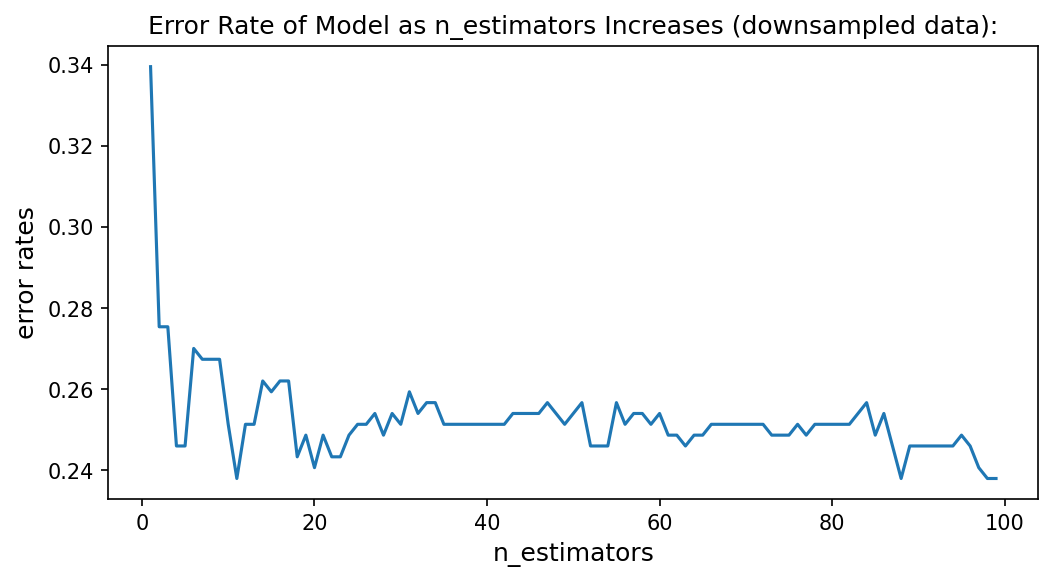

In [220]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(range(1,100),error_rates)

plt.title("Error Rate of Model as n_estimators Increases (downsampled data):", fontsize=12)
plt.xlabel("n_estimators",fontsize=12)
plt.ylabel("error rates", fontsize=12)

plt.show()

In [221]:
ds_base_ada_model = AdaBoostClassifier()
ds_ada_param_grid = {
    "n_estimators":range(15,20),
    "learning_rate":[0.1,0.01,0.001,0.0001],
}
ds_ada_grid_model = GridSearchCV(ds_base_ada_model,param_grid=ds_ada_param_grid)
ds_ada_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': range(15, 20)})

ADA MODEL PARAMETERS
Best Parameters:

 {'learning_rate': 0.1, 'n_estimators': 18} 

Best Model:

 AdaBoostClassifier(learning_rate=0.1, n_estimators=18) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.61      0.67       181
           1       0.69      0.82      0.75       193

    accuracy                           0.72       374
   macro avg       0.72      0.71      0.71       374
weighted avg       0.72      0.72      0.71       374

[[110  71]
 [ 35 158]]


<Figure size 900x450 with 0 Axes>

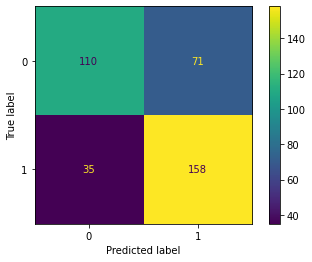

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.59      0.69       198
           1       0.66      0.88      0.75       176

    accuracy                           0.72       374
   macro avg       0.75      0.73      0.72       374
weighted avg       0.75      0.72      0.72       374

[[117  81]
 [ 22 154]]


<Figure size 900x450 with 0 Axes>

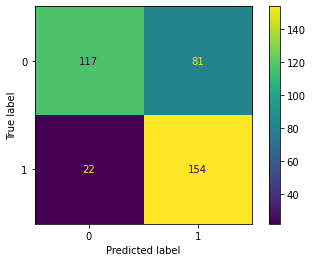

----------------------------------------------------------------------------------------------------


In [222]:
print("="*100)
print("ADA MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",ds_ada_grid_model.best_params_,"\n")
print("Best Model:\n\n",ds_ada_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
ds_ada_prediction_eval = ds_ada_grid_model.predict(X_eval)
evaluate_model(ds_ada_grid_model, X_eval, y_eval, ds_ada_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
ds_ada_prediction_test = ds_ada_grid_model.predict(X_test)
ds_ada_final_metrics = evaluate_model(ds_ada_grid_model, X_test, y_test, ds_ada_prediction_test)
print("-"*100)
print("="*100)

In [223]:
ds_base_gb_model = GradientBoostingClassifier()
ds_gb_param_grid = {
    "n_estimators":range(1,100),
    "learning_rate":[0.1,0.05,0.2],
    "max_depth":[3,4,5]
}
ds_gb_grid_model = GridSearchCV(ds_base_gb_model,param_grid=ds_gb_param_grid)
ds_gb_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': range(1, 100)})

GB MODEL PARAMETERS
Best Parameters:

 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 74} 

Best Model:

 GradientBoostingClassifier(max_depth=5, n_estimators=74) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       181
           1       0.74      0.77      0.76       193

    accuracy                           0.74       374
   macro avg       0.74      0.74      0.74       374
weighted avg       0.74      0.74      0.74       374

[[129  52]
 [ 44 149]]


<Figure size 900x450 with 0 Axes>

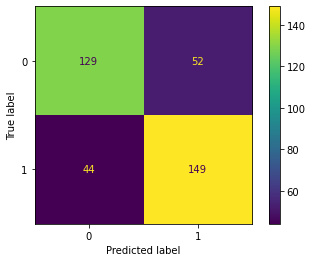

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       198
           1       0.70      0.74      0.72       176

    accuracy                           0.73       374
   macro avg       0.73      0.73      0.73       374
weighted avg       0.73      0.73      0.73       374

[[142  56]
 [ 45 131]]


<Figure size 900x450 with 0 Axes>

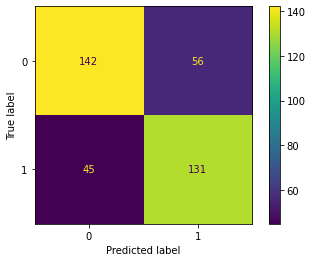

----------------------------------------------------------------------------------------------------


In [224]:
print("="*100)
print("GB MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",ds_gb_grid_model.best_params_,"\n")
print("Best Model:\n\n",ds_gb_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
ds_gb_prediction_eval = ds_gb_grid_model.predict(X_eval)
evaluate_model(ds_gb_grid_model, X_eval, y_eval, ds_gb_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
ds_gb_prediction_test = ds_gb_grid_model.predict(X_test)
ds_gb_final_metrics = evaluate_model(ds_gb_grid_model, X_test, y_test, ds_gb_prediction_test)
print("-"*100)
print("="*100)

In [229]:
# try again with downsample dataset
# this worked for the downsample dataset
base_SVC_model = SVC()
SVC_param_grid = {
    "C":np.linspace(1,10,10),
    "kernel":["linear","poly","rbf"],
    "degree":[2,3,4],
    "gamma":["auto"],
    "random_state":[42]
}
SVC_grid_model = GridSearchCV(base_SVC_model,param_grid=SVC_param_grid)
SVC_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'degree': [2, 3, 4], 'gamma': ['auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [42]})

SVC MODEL PARAMETERS
Best Parameters:

 {'C': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42} 

Best Model:

 SVC(degree=2, gamma='auto', random_state=42) 

---------------------------------------------------------------------------------------------------- 

PERFORMANCE METRICS

CLASSIFICATION REPORT & CONFUSION MATRIX FOR EVALUATION TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       181
           1       0.75      0.80      0.77       193

    accuracy                           0.76       374
   macro avg       0.76      0.76      0.76       374
weighted avg       0.76      0.76      0.76       374

[[130  51]
 [ 39 154]]


<Figure size 900x450 with 0 Axes>

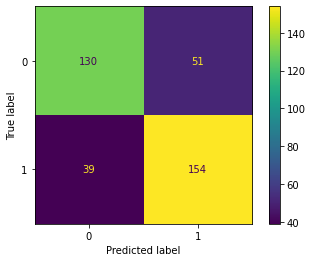

----------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT & CONFUSION MATRIX FOR HOLDOUT TEST DATA:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       198
           1       0.71      0.81      0.76       176

    accuracy                           0.76       374
   macro avg       0.76      0.76      0.76       374
weighted avg       0.77      0.76      0.76       374

[[141  57]
 [ 33 143]]


<Figure size 900x450 with 0 Axes>

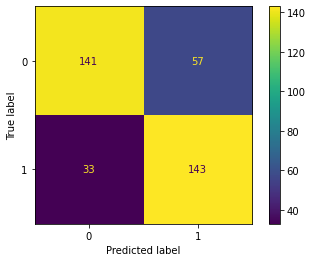

----------------------------------------------------------------------------------------------------


In [230]:
print("="*100)
print("SVC MODEL PARAMETERS")
print("="*100)
print("Best Parameters:\n\n",SVC_grid_model.best_params_,"\n")
print("Best Model:\n\n",SVC_grid_model.best_estimator_,"\n")
print("-"*100,"\n")

print("="*100)
print("PERFORMANCE METRICS")
print("="*100)

print("\nClassification Report & Confusion Matrix For Evaluation Test Data:".upper())
print("-"*100)
SVC_prediction_eval = SVC_grid_model.predict(X_eval)
evaluate_model(SVC_grid_model, X_eval, y_eval, SVC_prediction_eval)
print("-"*100)

print("\nClassification Report & Confusion Matrix For Holdout Test Data:".upper())
print("-"*100)
SVC_prediction_test = SVC_grid_model.predict(X_test)
SVC_final_metrics = evaluate_model(SVC_grid_model, X_test, y_test, SVC_prediction_test)
print("-"*100)
print("="*100)